# Weighted Rating

I was looking for an algorithm that takes into account the number of votes and not just the average rating. For example a 4 star review with 100 reviewers should account for more that 5 star review from 3 people.

A bit of googling found [an answer on mathexchange](http://math.stackexchange.com/questions/942738/algorithm-to-calculate-rating-based-on-multiple-reviews-using-both-review-score). The formula given there is:

$score = 5p/10 + 5(1 -e^{-q/Q})$

Where
* `p` is the rating
* `q` is the number of votes
* `Q` is the weight of number of votes

This looked good but I wanted to have a quick look on how this behaves. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
def weighted_score(rating, votes, weight=10):
    return (5 * rating/10.0) + (5 * (1 - np.e**(-votes/weight)))

In [4]:
for rating, votes in [(5, 10), (4, 1000)]:
    s = weighted_score(rating, votes)
    print('rating of %d from %d people = %.2f' % (rating, votes, s))

rating of 5 from 10 people = 5.66
rating of 4 from 1000 people = 7.00


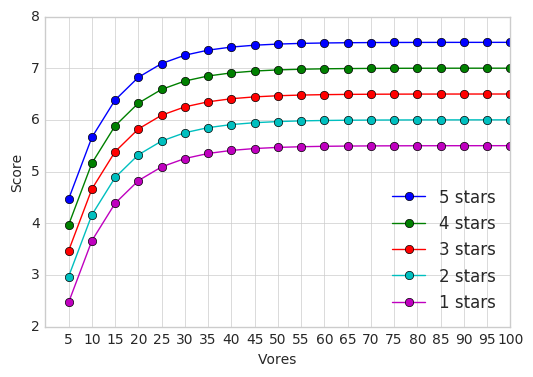

In [5]:
ratings = [5, 4, 3, 2, 1]
votes = range(5, 101, 5)
for rating in ratings:
    scores = [weighted_score(rating, vote) for vote in votes]
    plt.plot(votes, scores, '-o', label='%d stars' % rating)

plt.xticks(votes)
plt.xlabel('Vores')
plt.ylabel('Score')
plt.legend(loc='best');

We can see for example that 3 stars with 15 votes gets more than 5 stars with 5 votes. I might play a bit with the weight to tweak the scores but looks like it's the right solution.